## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import abs, sqrt, avg
from pyspark.sql import DataFrameStatFunctions as statFunc
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer
import pyspark.sql.functions as F

# load train data
file_location = "/FileStore/tables/train_data.csv"
file_type = "csv"
 
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
 
# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
 
display(df)

id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
bK13N34R,3921151,(2013 NR34),2013 NR34,null,null,N,N,19.1,null,null,null,1,2459000.5,59000,2.0200531E7,J2000,0.2395140902948033,2.467962162977906,1.8768504506302568,4.2847086382780155,187.4435648528415,162.4326374957067,252.60662934088057,3.0590738753255535,0.2542121643500829,2459422.955671756,2.0210727455671802E7,1416.139943265003,3.8771798583572994,0.871481,339.15426077,1.6637999999999999E-6,2.8261999999999997E-7,3.9211000000000005E-6,2.1708000000000003E-5,1.2328E-4,0.0013828,7.827999999999999E-4,3.5030999999999997E-7,4.3666E-8,0.0030714,2.4325E-4,MBA,0.54462
bK15P50H,3725394,(2015 PH50),2015 PH50,null,null,N,N,19.699,null,null,null,JPL 3,2457245.5,57245,2.0150811E7,J2000,0.2369724826300891,2.365728138761921,1.805115668491649,3.2149011772728504,58.35429368550654,290.4174436760314,345.8561643481903,2.926340609032194,0.2708674508386901,2457297.716815302,2.01510022168153E7,1329.063344027966,3.63877712259539,0.801128,311.77498376,0.0033089,0.015305000000000001,0.0056419,0.024416999999999998,0.57431,4.3121,2.1855,0.018932,0.0026285,8.4517,12.897,MBA,0.49686
a0443673,2443673,443673 (2015 HD155),443673,null,null,N,N,16.4,null,null,null,9,2459000.5,59000,2.0200531E7,J2000,0.2503428686832137,2.715705981368436,2.0358483554925,11.03984398082382,236.99168698795668,51.7185707883975,349.60064228534617,3.3955636072443722,0.2202317605851152,2459047.7200634778,2.02007172200635E7,1634.641611380422,4.4754048223967695,1.04054,404.9469518,4.5209000000000005E-8,4.5365E-8,1.28E-7,9.3045E-6,3.9713000000000004E-5,4.5833999999999995E-5,2.832E-5,5.6721E-8,5.518300000000001E-9,1.2943E-4,4.0959E-5,MBA,0.5393
bK16U95M,3762976,(2016 UM95),2016 UM95,null,null,N,N,19.048,null,null,null,4,2459000.5,59000,2.0200531E7,J2000,0.1392587161510286,2.5278053684836403,2.17578643818893,6.0638148322223,22.79156041768309,350.82965423869337,335.73666891094086,2.8798242987783484,0.2452384858901295,2459099.4376973235,2.0200906937697303E7,1467.958826663468,4.01905222905809,1.1768,457.97525599999994,0.0011692999999999999,0.0040728000000000006,0.0064406,0.050769999999999996,0.050185,0.72613,0.29743,0.00464,5.927E-4,1.4209,3.5478,MBA,0.51993
bK08CM9K,3961319,(2008 CK229),2008 CK229,null,null,N,N,17.6,null,null,null,JPL 2,2459000.5,59000,2.0200531E7,J2000,0.1246940298255613,2.58183895862292,2.2598990545115965,4.448999521990394,58.92993336985667,351.3884285789563,53.224126541995325,2.9037788627342414,0.2375802577731892,2458776.4741190583,2.01910199741191E7,1515.277419825352,4.14860347659234,1.27057,494.46772689999995,1.2554E-7,4.8201E-8,3.3747E-7,1.3807999999999999E-5,7.825699999999999E-5,9.8129E-5,4.7211000000000006E-5,5.4211999999999996E-8,6.6532E-9,2.0218E-4,4.2433999999999994E-5,MBA,0.39566999999999997
bK09Sa6V,3880734,(2009 SV366),2009 SV366,null,null,N,N,16.7,null,null,null,JPL 2,2459000.5,59000,2.0200531E7,J2000,0.1806618239919973,2.6104014333183607,2.138801549023742,15.47269809537461,96.54669521691801,327.7133701350686,166.9163030554445,3.08200131761298,0.2336916123727959,2458286.2411468015,2.0180616741146803E7,1540.491746129557,4.21763653971131,1.16784,454.4882928,5.7705E-8,3.2518E-8,1.5127E-7,6.938200000000001E-6,2.9595E-5,3.8224E-5,2.8154000000000002E-5,3.8392E-8,4.3666E-9,1.1492E-4,2.8785E-5,MBA,0.5758
a0203787,2203787,203787 (2002 TH22),203787,null,null,N,N,16.2,null,null,null,12,2459000.5,59000,2.0200531E7,J2000,0.2803519266124396,2.968650154672411,2.1363833643716843,1.088762837313048,210.8479264807232,164.188599159001,157.80261965459292,3.8009169449731384,0.192692824714768,2458181.5664466196,2.01803040664466E7,1868.258460235284,5.11501289592138,1.13758,442.7120086,5.2589999999999996E-8,2.2447E-8,1.6369E-7,5.3079E-6,3.8975E-4,3.9002E-4,1.7393E-5,2.8739999999999998E-8,2.1855E-9,8.3327000000000

In [0]:
# Load test data
file_location = "/FileStore/tables/test_data.csv"
file_type = "csv"
 
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
 
# The applied options are for CSV files. For other file types, these will be ignored.
test= spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
 
display(test)

id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
a0396686,2396686,396686 (2002 TJ51),396686,null,null,N,N,17.3,null,null,null,JPL 14,2459000.5,59000,2.0200531E7,J2000,0.39470747434574105,2.637647025504356,1.5965480298519752,5.004695090879287,22.958513566461875,337.5101088922193,59.22066112957665,3.6787460211567367,0.2300801004496381,2458743.108504543,2.01909166085045E7,1564.672474049097,4.28383976467925,0.595232,231.64643744,9.492699999999999E-8,1.2808999999999999E-8,2.5372E-7,8.1749E-6,3.8829000000000004E-5,4.7473000000000004E-5,1.2115999999999999E-5,1.7864E-8,1.6759000000000002E-9,5.3733E-5,1.1397000000000001E-5,MCA,0.38528
bK07VM0X,3992319,(2007 VX220),2007 VX220,null,null,N,N,17.435,null,null,null,JPL 2,2459000.5,59000,2.0200531E7,J2000,0.02445100674901471,2.91967629872945,2.8482872738442784,1.119575173823843,252.1273087617482,106.5839576931803,229.45276043438682,2.991065323614623,0.1975613646337749,2459661.2933682157,2.02203227933682E7,1822.218634029697,4.988962721504991,1.84345,717.4154365,8.5786E-8,5.6696E-8,2.6901999999999996E-7,9.4507E-6,4.2754E-4,4.6719E-4,1.8963E-4,5.8082000000000004E-8,5.754600000000001E-9,9.6511E-4,5.3077E-5,MBA,0.6791699999999999
bK10TA2L,3569724,(2010 TL102),2010 TL102,null,null,N,N,18.776,null,null,null,JPL 3,2455475.5,55475,2.0101006E7,J2000,0.2191642554913477,2.6467819059400837,2.066701920076755,3.344411492070774,80.64116355815419,311.7612798852942,347.88970824386803,3.226861891803412,0.2288900101150546,2455528.408782476,2.01011279087825E7,1572.807829485618,4.30611315396473,1.07392,417.93744639999994,0.0023279,0.020125999999999998,0.020378999999999998,0.039986,0.37189,1.8663,0.96014,0.024537,0.0026108,4.5858,17.94,MBA,0.6167699999999999
bK13F07Y,3633049,(2013 FY7),2013 FY7,null,null,Y,N,22.5,null,null,null,17,2459000.5,59000,2.0200531E7,J2000,0.3096638933943817,1.5803128109916817,1.0909469931589781,18.361139327382578,356.2645883781242,118.22654058452079,257.205268366673,2.069678628824386,0.49612313887158704,2459207.6960035306,2.02012241960035E7,725.6263048298981,1.98665654984229,0.20569,80.0483773,8.965700000000001E-7,2.677E-8,1.42E-6,4.8644E-5,1.2937E-5,2.5814E-4,1.4685E-4,3.5060000000000004E-8,1.2605999999999999E-8,3.0083E-4,1.8438E-5,AMO,0.58458
bK14E01C,3898877,(2014 EC1),2014 EC1,null,null,N,N,17.660999999999998,null,null,null,JPL 1,2459000.5,59000,2.0200531E7,J2000,0.1804749212675224,2.6669689271247594,2.1856479199789898,14.71333501444207,157.8498912794679,9.869375690142006,148.6862136504624,3.1482899342705286,0.2262961369475819,2458343.4573493567,2.0180812957349397E7,1590.835817420023,4.3554710949213495,1.19451,464.8674567,2.2527E-6,3.5519E-6,3.3495E-6,6.375699999999999E-5,4.595E-5,0.0023724,0.0026384,4.193E-6,4.5208E-7,0.010353,0.0031780999999999997,MBA,0.5413100000000001
bK16J06H,3752796,(2016 JH6),2016 JH6,null,null,N,N,20.66,null,null,null,4,2459000.5,59000,2.0200531E7,J2000,0.0924174389856314,1.5443905923885768,1.401661969046523,16.39801617517548,77.12056926463045,70.74379348392286,109.52484736461771,1.6871192157306318,0.5135329950220777,2458787.22286216,2.01910307228622E7,701.0260362813162,1.9193046852328999,0.47695600000000005,185.61696652,2.465E-5,4.9805E-5,7.8434E-5,0.0020685,0.0023971,0.0077039000000000005,0.039567000000000005,5.4408000000000005E-5,2.4840999999999998E-5,0.066737,0.033911000000000004,MCA,0.49827
a0456023,2456023,456023 (2005 YB88),456023,null,null,N,N,17.7,null,null,null,14,2459000.5,59000,2.0200531E7,J2000,0.131410319092072,2.213022516004117,1.922208521018076,3.423528816595293,112.08976813120279,126.02034568244551,24.14609158093405,2.5038365109901584,0.2993817515997451,2458919.846815723,2.0200311346815698E7,1202.4781005400012,3.29220561407256,0.912365,355.06508705,4.6759E-8,2.3425E-8,9.8544E-8,6.6887E-6,1.0878E-4,1.1385E-4,3.8012E-5,2

In [0]:
#check dimensions of train data
(df.count() , len(df.columns))

Out[3]: (750882, 45)

In [0]:
#check missig values for each column
missing=df.agg(*[F.count(F.when(F.isnull(c),c)).alias(c) for c in df.columns])
missing.show()

+---+-----+---------+----+------+------+---+---+----+--------+------+--------------+--------+-----+---------+---------+-------+---+---+---+---+---+---+---+---+---+---+------+---+-----+----+-------+-------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-----+---+
 id|spkid|full_name|pdes| name|prefix|neo|pha| H|diameter|albedo|diameter_sigma|orbit_id|epoch|epoch_mjd|epoch_cal|equinox| e| a| q| i| om| w| ma| ad| n| tp|tp_cal|per|per_y|moid|moid_ld|sigma_e|sigma_a|sigma_q|sigma_i|sigma_om|sigma_w|sigma_ma|sigma_ad|sigma_n|sigma_tp|sigma_per|class|rms|
+---+-----+---------+----+------+------+---+---+----+--------+------+--------------+--------+-----+---------+---------+-------+---+---+---+---+---+---+---+---+---+---+------+---+-----+----+-------+-------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-----+---+
 0| 0| 0| 0|733272|750866| 2| 0|4982| 641940|642815| 642052| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 2| 0| 0| 0| 2| 1| 0| 0| 1| 1| 1| 1| 1| 1| 1| 3| 1| 1| 3| 0| 1|
+---+-----+---------+----+------+------+---+---+----+--------+------+--------------+--------+-----+---------+---------+-------+---+---+---+---+---+---+---+---+---+---+------+---+-----+----+-------+-------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-----+---+

In [0]:
#impute the missing values for neo
df.createOrReplaceTempView("train")
sqlDF1 = spark.sql("SELECT avg(q) FROM train where neo='N'")
sqlDF1.show()
sqlDF2 = spark.sql("SELECT avg(q) FROM train where neo='Y'")
sqlDF2.show()
train1=df.withColumn('neo_new',when(df['q']<1.3 ,"Y").when(df['q']>1.3,'N').otherwise(df['neo']))


+------------------+
 avg(q)|
+------------------+
2.4332298591152335|
+------------------+

+------------------+
 avg(q)|
+------------------+
0.9141650196632071|
+------------------+

In [0]:
#impute the missing values for neo
test.createOrReplaceTempView("test")
sqlDF1 = spark.sql("SELECT avg(q) FROM test where neo='N'")
sqlDF1.show()
sqlDF2 = spark.sql("SELECT avg(q) FROM test where neo='Y'")
sqlDF2.show()
test1=df.withColumn('neo_new',when(df['q']<1.3 ,"Y").when(df['q']>1.3,'N').otherwise(df['neo']))


+-----------------+
 avg(q)|
+-----------------+
2.441126764683449|
+-----------------+

+------------------+
 avg(q)|
+------------------+
0.9131537424388464|
+------------------+

In [0]:
columns_to_drop = ['id','spkid','full_name','pdes','name','prefix','diameter','albedo','diameter_sigma',
 'neo','epoch','epoch_cal','equinox','tp_cal','moid_ld']
train1 = train1.drop(*columns_to_drop)
test1 = test1.drop(*columns_to_drop)

In [0]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder
label_indexer = StringIndexer(inputCols=["neo_new", "orbit_id", "class", "pha"], outputCols=["neo_index","orbit_id_index", "class_index", "pha_encode"])
df_index = label_indexer.fit(train1).transform(train1).drop(*["neo_new", "orbit_id", "class", "pha"])
test_index = label_indexer.fit(test1).transform(test1).drop(*["neo_new", "orbit_id", "class", "pha"])


In [0]:
#replace missing columns with mean value
from pyspark.ml.feature import Imputer
 
imputer = Imputer(
    inputCols=df_index.columns, 
    outputCols=["{}_imputed".format(c) for c in df_index.columns]
)
df_index=imputer.fit(df_index).transform(df_index)
test_index=imputer.fit(test_index).transform(test_index)


In [0]:
columns_to_drop = ['H','ad','per','per_y','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','rms','n_imputed','epoch_mjd_imputed','orbit_id_index_imputed','q_imputed','a_imputed','moid_imputed','class_index_imputed',
'e_imputed','neo_index_imputed','tp_imputed','w_imputed','i_imputed','om_imputed','ma_imputed','pha_encode_imputed']
df_index = df_index.drop(*columns_to_drop)
test_index = test_index.drop(*columns_to_drop)

In [0]:
one_hot_encoder = OneHotEncoder(inputCols=["orbit_id_index", "class_index"], outputCols=["orbit_onehot", "class_onehot"])
df_encoded = one_hot_encoder.fit(df_index).transform(df_index).drop(*["orbit_id_index", "class_index"])
test_encoded = one_hot_encoder.fit(test_index).transform(test_index).drop(*["orbit_id_index", "class_index"])

In [0]:
# Heatmap with oneplus sigma
df_plussigma1 = df_encoded.withColumn('plussigma_e', expr("sigma_e_imputed+e"))
test_plussigma1 = test_encoded.withColumn('plussigma_e', expr("sigma_e_imputed+e"))
df_plussigma2 = df_plussigma1.withColumn('plussigma_a', expr("sigma_a_imputed+a"))
test_plussigma2 = test_plussigma1.withColumn('plussigma_a', expr("sigma_a_imputed+a"))
df_plussigma3 = df_plussigma2.withColumn('plussigma_q', expr("sigma_q_imputed+q"))
test_plussigma3 = test_plussigma2.withColumn('plussigma_q', expr("sigma_q_imputed+q"))
df_plussigma4 = df_plussigma3.withColumn('plussigma_i', expr("sigma_i_imputed+i"))
test_plussigma4 = test_plussigma3.withColumn('plussigma_i', expr("sigma_i_imputed+i"))
df_plussigma5 = df_plussigma4.withColumn('plussigma_om', expr("sigma_om_imputed+om"))
test_plussigma5 = test_plussigma4.withColumn('plussigma_om', expr("sigma_om_imputed+om"))
df_plussigma6 = df_plussigma5.withColumn('plussigma_w', expr("sigma_w_imputed+w"))
test_plussigma6 = test_plussigma5.withColumn('plussigma_w', expr("sigma_w_imputed+w"))
df_plussigma7 = df_plussigma6.withColumn('plussigma_ma', expr("sigma_ma_imputed+ma"))
test_plussigma7 = test_plussigma6.withColumn('plussigma_ma', expr("sigma_ma_imputed+ma"))
df_plussigma8 = df_plussigma7.withColumn('plussigma_ad', expr("sigma_ad_imputed+ad_imputed"))
test_plussigma8 = test_plussigma7.withColumn('plussigma_ad', expr("sigma_ad_imputed+ad_imputed"))
df_plussigma9 = df_plussigma8.withColumn('plussigma_n', expr("sigma_n_imputed+n"))
test_plussigma9 = test_plussigma8.withColumn('plussigma_n', expr("sigma_n_imputed+n"))
df_plussigma10 = df_plussigma9.withColumn('plussigma_tp', expr("sigma_tp_imputed+tp"))
test_plussigma10 = test_plussigma9.withColumn('plussigma_tp', expr("sigma_tp_imputed+tp"))
df_plussigma11 = df_plussigma10.withColumn('plussigma_per',expr("sigma_per_imputed+per_imputed"))
test_plussigma11 = test_plussigma10.withColumn('plussigma_per',expr("sigma_per_imputed+per_imputed"))

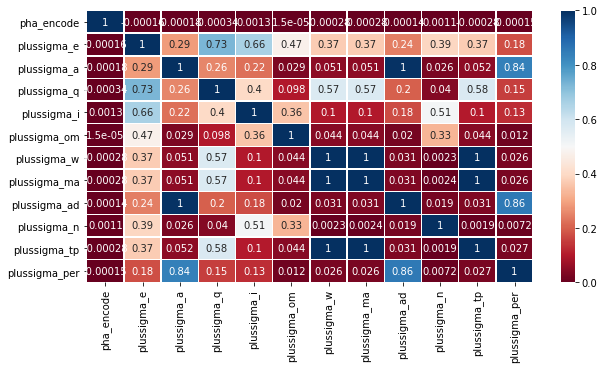

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plussigma=df_plussigma11.toPandas()
plussigma=plussigma[['pha_encode','plussigma_e','plussigma_a','plussigma_q','plussigma_i','plussigma_om','plussigma_w','plussigma_ma','plussigma_ad','plussigma_n','plussigma_tp','plussigma_per']]
plt.figure(figsize=(10,5))
sns.heatmap(plussigma.corr(),annot=True,linewidth=.5,cmap="RdBu")

In [0]:
# heatmap with oneminus sigma
df_minussigma1 = df_encoded.withColumn('minussigma_e', expr("sigma_e_imputed-e"))
df_minussigma1 = df_encoded.withColumn('minussigma_e', expr("sigma_e_imputed-e"))
df_minussigma2 = df_minussigma1.withColumn('minussigma_a', expr("sigma_a_imputed-a"))
df_minussigma3 = df_minussigma2.withColumn('minussigma_q', expr("sigma_q_imputed-q"))
df_minussigma4 = df_minussigma3.withColumn('minussigma_i', expr("sigma_i_imputed-i"))
df_minussigma5 = df_minussigma4.withColumn('minussigma_om', expr("sigma_om_imputed-om"))
df_minussigma6 = df_minussigma5.withColumn('minussigma_w', expr("sigma_w_imputed-w"))
df_minussigma7 = df_minussigma6.withColumn('minussigma_ma', expr("sigma_ma_imputed-ma"))
df_minussigma8 = df_minussigma7.withColumn('minussigma_ad', expr("sigma_ad_imputed-ad_imputed"))
df_minussigma9 = df_minussigma8.withColumn('minussigma_n', expr("sigma_n_imputed-n"))
df_minussigma10 = df_minussigma9.withColumn('minussigma_tp', expr("sigma_tp_imputed-tp"))
df_minussigma11 = df_minussigma10.withColumn('minussigma_per', expr("sigma_per_imputed-per_imputed"))

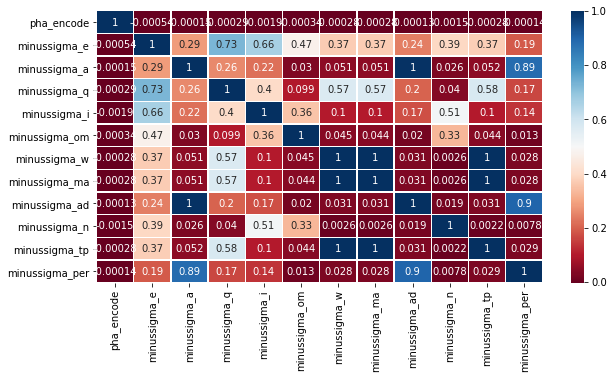

In [0]:
minussigma=df_minussigma11.toPandas()
minussigma=minussigma[['pha_encode','minussigma_e','minussigma_a','minussigma_q','minussigma_i','minussigma_om','minussigma_w','minussigma_ma','minussigma_ad','minussigma_n','minussigma_tp','minussigma_per']]
plt.figure(figsize=(10,5))
sns.heatmap(minussigma.corr(),annot=True,linewidth=.5,cmap="RdBu")

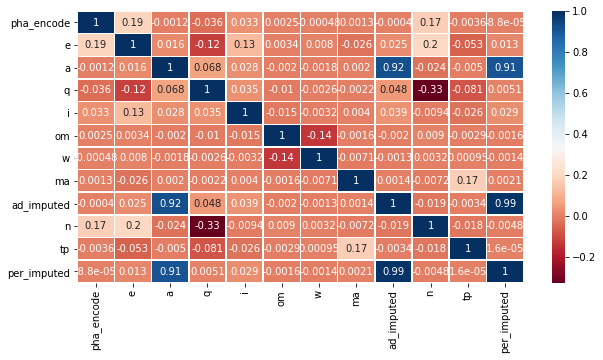

In [0]:
# heatmap without plus or minus sigma
df_heatmap=df_encoded.toPandas()
train_heatmap=df_heatmap[['pha_encode','e','a','q','i','om','w','ma','ad_imputed','n','tp','per_imputed']]
plt.figure(figsize=(10,5))
sns.heatmap(train_heatmap.corr(),annot= True,linewidth=.5,cmap="RdBu")

In [0]:
df_minussigma1 = df_plussigma11.withColumn('minussigma_e', expr("sigma_e_imputed-e"))
test_minussigma1 = test_plussigma11.withColumn('minussigma_e', expr("sigma_e_imputed-e"))
df_minussigma2 = df_minussigma1.withColumn('minussigma_a', expr("sigma_a_imputed-a"))
test_minussigma2 = test_minussigma1.withColumn('minussigma_a', expr("sigma_a_imputed-a"))
df_minussigma3 = df_minussigma2.withColumn('minussigma_q', expr("sigma_q_imputed-q"))
test_minussigma3 = test_minussigma2.withColumn('minussigma_q', expr("sigma_q_imputed-q"))
df_minussigma4 = df_minussigma3.withColumn('minussigma_i', expr("sigma_i_imputed-i"))
test_minussigma4 = test_minussigma3.withColumn('minussigma_i', expr("sigma_i_imputed-i"))
df_minussigma5 = df_minussigma4.withColumn('minussigma_om', expr("sigma_om_imputed-om"))
test_minussigma5 = test_minussigma4.withColumn('minussigma_om', expr("sigma_om_imputed-om"))
df_minussigma6 = df_minussigma5.withColumn('minussigma_w', expr("sigma_w_imputed-w"))
test_minussigma6 = test_minussigma5.withColumn('minussigma_w', expr("sigma_w_imputed-w"))
df_minussigma7 = df_minussigma6.withColumn('minussigma_ma', expr("sigma_ma_imputed-ma"))
test_minussigma7 = test_minussigma6.withColumn('minussigma_ma', expr("sigma_ma_imputed-ma"))
df_minussigma8 = df_minussigma7.withColumn('minussigma_ad', expr("sigma_ad_imputed-ad_imputed"))
test_minussigma8 = test_minussigma7.withColumn('minussigma_ad', expr("sigma_ad_imputed-ad_imputed"))
df_minussigma9 = df_minussigma8.withColumn('minussigma_n', expr("sigma_n_imputed-n"))
test_minussigma9 = test_minussigma8.withColumn('minussigma_n', expr("sigma_n_imputed-n"))
df_minussigma10 = df_minussigma9.withColumn('minussigma_tp', expr("sigma_tp_imputed-tp"))
test_minussigma10 = test_minussigma9.withColumn('minussigma_tp', expr("sigma_tp_imputed-tp"))
df_minussigma11 = df_minussigma10.withColumn('minussigma_per', expr("sigma_per_imputed-per_imputed"))
test_minussigma11 = test_minussigma10.withColumn('minussigma_per', expr("sigma_per_imputed-per_imputed"))


In [0]:
#since the ad_imputed is too correlated with per_imputed, drop one column to save computational efficiency
columns_to_drop = ['per_imputed']

df_encoded = df_minussigma11.drop(*columns_to_drop)
test_encoded = test_minussigma11.drop(*columns_to_drop)
df_encoded.show()

+---------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+---------+----------------+--------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+
epoch_mjd| e| a| q| i| om| w| ma| n| tp| moid|neo_index|pha_encode| sigma_w_imputed| sigma_q_imputed| sigma_tp_imputed| sigma_a_imputed| sigma_i_imputed| rms_imputed| per_y_imputed| sigma_ad_imputed| sigma_e_imputed| ad_imputed| sigma_n_imputed| sigma_om_imputed| sigma_per_imputed| sigma_ma_imputed|H_imputed| orbit_onehot| class_onehot| plussigma_e| plussigma_a| plussigma_q| plussigma_i| plussigma_om| plussigma_w| plussigma_ma| plussigma_ad| plussigma_n| plussigma_tp| plussigma_per| minussigma_e| minussigma_a| minussigma_q| minussigma_i| minussigma_om| minussigma_w| minussigma_ma| minussigma_ad| minussigma_n| minussigma_tp| minussigma_per|
+---------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+---------+----------------+--------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+
 59000| 0.2395140902948033| 2.467962162977906|1.8768504506302568|4.2847086382780155| 187.4435648528415| 162.4326374957067|252.60662934088057| 0.2542121643500829| 2459422.955671756| 0.871481| 0.0| 0.0| 0.0013828|3.921100000000000...| 0.0030714|2.826199999999999...|2.170800000000000...| 0.54462|3.8771798583572994|3.503099999999999...|1.663799999999999...|3.0590738753255535| 4.3666E-8| 1.2328E-4| 2.4325E-4|7.827999999999999E-4| 19.1| (497,[0],[1.0])|(12,[0],[1.0])| 0.2395157540948033|2.4679624455979057|1.8768543717302568| 4.284730346278016| 187.4436881328415| 162.4340202957067|252.60741214088057|3.0590742256355536| 0.2542122080160829| 2459422.958743156| 1416.140186515003| -0.2395124264948033| -2.467961880357906|-1.8768465295302568| -4.284686930278015| -187.4434415728415| -162.4312546957067|-252.60584654088058|-3.0590735250155534|-0.25421212068408294| -2459422.952600356| -1416.139700015003|
 57245| 0.2369724826300891| 2.365728138761921| 1.805115668491649|3.2149011772728504| 58.35429368550654| 290.4174436760314| 345.8561643481903| 0.2708674508386901| 2457297.716815302| 0.801128| 0.0| 0.0| 4.3121| 0.0056419| 8.4517|0.015305000000000001|0.024416999999999998| 0.49686| 3.63877712259539| 0.018932| 0.0033089| 2.926340609032194| 0.0026285| 0.57431| 12.897| 2.1855| 19.699| (497,[3],[1.0])|(12,[0],[1.0])| 0.2402813826300891| 2.381033138761921| 1.810757568491649|

In [0]:
from pyspark.ml.linalg import Vectors 
from pyspark.ml.feature import VectorAssembler 
vector_assembler=VectorAssembler(inputCols=df_encoded.schema.names, outputCol='features')
df_vector=vector_assembler.transform(df_encoded)
test_vector=vector_assembler.transform(test_encoded)
df_vector.show(10)

+---------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+--------+---------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+---------+----------------+--------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+
epoch_mjd| e| a| q| i| om| w| ma| n| tp| moid|neo_index|pha_encode| sigma_w_imputed| sigma_q_imputed| sigma_tp_imputed| sigma_a_imputed| sigma_i_imputed| rms_imputed| per_y_imputed| sigma_ad_imputed| sigma_e_imputed| ad_imputed| sigma_n_imputed| sigma_om_imputed| sigma_per_imputed| sigma_ma_imputed|H_imputed| orbit_onehot| class_onehot| plussigma_e| plussigma_a| plussigma_q| plussigma_i| plussigma_om| plussigma_w| plussigma_ma| plussigma_ad| plussigma_n| plussigma_tp| plussigma_per| minussigma_e| minussigma_a| minussigma_q| minussigma_i| minussigma_om| minussigma_w| minussigma_ma| minussigma_ad| minussigma_n| minussigma_tp| minussigma_per| features|
+---------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+--------+---------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+---------+----------------+--------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+
 59000|0.2395140902948033| 2.467962162977906|1.8768504506302568|4.2847086382780155| 187.4435648528415| 162.4326374957067|252.60662934088057| 0.2542121643500829| 2459422.955671756|0.871481| 0.0| 0.0| 0.0013828|3.921100000000000...| 0.0030714|2.826199999999999...|2.170800000000000...| 0.54462|3.8771798583572994|3.503099999999999...|1.663799999999999...|3.0590738753255535| 4.3666E-8| 1.2328E-4| 2.4325E-4|7.827999999999999E-4| 19.1| (497,[0],[1.0])|(12,[0],[1.0])| 0.2395157540948033|2.4679624455979057|1.8768543717302568| 4.284730346278016| 187.4436881328415| 162.4340202957067|252.60741214088057|3.0590742256355536| 0.2542122080160829| 2459422.958743156| 1416.140186515003| -0.2395124264948033| -2.467961880357906|-1.8768465295302568| -4.284686930278015| -187.4434415728415| -162.4312546957067|-252.60584654088058|-3.0590735250155534|-0.25421212068408294| -2459422.952600356| -1416.139700015003|(559,[0,1,2,3,4,5...|
 57245|0.2369724826300891| 2.365728138761921| 1.805115668491649|3.2149011772728504| 58.35429368550654| 290.4174436760314| 345.8561643481903| 0.2708674508386901| 2457297.716815302|0.801128| 0.0| 0.0| 4.3121| 0.0056419| 8.4517|0.015305000000000001|0.024416999999999998| 0.49686| 3.63877712259539| 0.018932| 0.0033089| 2.926340609032194| 0.0026285| 0.57431| 12.897| 2.1855| 19.699| (497,[3],[1.0])|(12,[0],[1.0])| 0.240281382630

In [0]:
# Feature Engineering
df_encoded = df_encoded.withColumn('n_ad_Engineered', col('n') * col('ad_imputed'))
test_encoded = test_encoded.withColumn('n_ad_Engineered', col('n') * col('ad_imputed'))

df_encoded = df_encoded.withColumn('q_e_Engineered', col('q') - col('e'))
test_encoded = test_encoded.withColumn('q_e_Engineered', col('q') - col('e'))

df_encoded = df_encoded.withColumn('n_e_Engineered', col('n') + col('e'))
test_encoded = test_encoded.withColumn('n_e_Engineered', col('n') + col('e'))

df_encoded = df_encoded.withColumn('a_e_Engineered', col('a') / col('e'))
test_encoded = test_encoded.withColumn('a_e_Engineered', col('a') / col('e'))

df_encoded = df_encoded.withColumn('H_Engineered',when(df_encoded['H_imputed']<22 ,1).when(df_encoded['H_imputed']>22,0).otherwise(0))
test_encoded = test_encoded.withColumn('H_Engineered',when(test_encoded['H_imputed']<22 ,1).when(test_encoded['H_imputed']>22,0).otherwise(0))

df_encoded = df_encoded.withColumn('moid_Engineered',when(df_encoded['moid']<0.05,1).when(df_encoded['moid']>0.05,0).otherwise(0))
test_encoded = test_encoded.withColumn('moid_Engineered',when(test_encoded['moid']<0.05,1).when(test_encoded['moid']>0.05,0).otherwise(0))

df_encoded = df_encoded.withColumn("ad_a_Engineered",col('ad_imputed') - col('a'))
test_encoded = test_encoded.withColumn("ad_a_Engineered",col('ad_imputed') - col('a'))

df_encoded = df_encoded.withColumn('ad_pery_Engineered', col('ad_imputed') / col('per_y_imputed'))
test_encoded = test_encoded.withColumn('ad_pery_Engineered', col('ad_imputed') / col('per_y_imputed'))

df_encoded = df_encoded.withColumn('a_pery_Engineered', col('a') / col('per_y_imputed'))
test_encoded = test_encoded.withColumn('a_pery_Engineered', col('a') / col('per_y_imputed'))

df_encoded = df_encoded.withColumn('ada_Engineered', col('ad_imputed') / col('a'))
test_encoded = test_encoded.withColumn('ada_Engineered', col('ad_imputed') / col('a'))

df_encoded = df_encoded.withColumn('moid_a_Engineered',col('moid')/col('a'))
test_encoded = test_encoded.withColumn('moid_a_Engineered',col('moid')/col('a'))

df_encoded = df_encoded.withColumn('moid_H_Engineered',when((df_encoded['moid']<0.05) & (df_encoded['H_imputed']<22),1).otherwise(0))
test_encoded = test_encoded.withColumn('moid_H_Engineered',when((test_encoded['moid']<0.05) & (test_encoded['H_imputed']<22),1).otherwise(0))


In [0]:
# Over-sample, Under-sample and Cross-Validation
from pyspark.ml.feature import MinMaxScaler,StandardScaler, MaxAbsScaler
def scale_df(df_encoded, method, cols, drop=True):
  """
  scale all columns in the cols of df_encoded, return a scaled df_encoded
  Args:
    df: A dataframe that is going to be scaled
    method: minmax, standard and maxabs
      - minmax: Rescale each feature individually to a common range [min, max] linearly using column summary statistics
      - standard: Standardizes features by removing the mean and scaling to unit variance
      - maxabs: Rescale each feature individually to range [-1, 1]
    cols: a list of column names that are in the dataframe
    drop: Whether or not drop the columns after scaling
  
  Return:
    returns a scaled dataframe
  """
  for c in cols:
    if method == "minmax":
      min_num = df_encoded.agg({c: "max"}).first()[0]
      max_num = df_encoded.agg({c: "min"}).first()[0]
      df_encoded = df_encoded.withColumn(c + "_minmax", (col(c) - min_num) / (max_num - min_num))
    else:
      raise ValueError("No such method")
  return df_encoded.select(cols) if drop else df_encoded

In [0]:
cols = [ c for c in df_encoded.schema.names if c not in ["neo_index", "orbit_onehot", "class_onehot"] ]
df_encoded = scale_df(df_encoded.na.drop(), "minmax", cols)
test_encoded = scale_df(test_encoded.na.drop(), "minmax", cols)

In [0]:
# Feature Selection
# MutualInfoClassif
import numpy as np
from sklearn.feature_selection import mutual_info_classif as MIC

df_data = df_encoded.na.drop().toPandas()
cols = [ c for c in df_encoded.schema.names if c not in  ["neo_index", "orbit_onehot", "class_onehot", 'pha_encode' ] ]
mutual_info = MIC(np.array(df_data[cols]), np.array(df_data['pha_encode']), discrete_features= False)
print(mutual_info)

[1.26142547e-01 6.65146357e-03 4.60468656e-03 9.14976829e-03
 5.10857241e-04 4.44781874e-05 6.03836994e-05 0.00000000e+00
 4.60365210e-03 7.00860596e-04 1.01869131e-02 2.81874915e-04
 2.22627076e-03 1.09381626e-04 2.14418638e-03 1.20059919e-03
 1.17180591e-03 4.60407513e-03 1.72486394e-03 1.60057874e-03
 2.69130261e-03 9.78512518e-04 1.28128485e-03 7.79014561e-04
 1.13772892e-04 1.04598670e-02 6.27358692e-03 4.59992308e-03
 9.10231370e-03 3.92682406e-04 6.01360800e-05 2.96206133e-05
 2.28196734e-05 2.72497084e-03 4.25345668e-03 6.75275993e-04
 4.55859279e-03 6.65185119e-03 4.47611974e-03 8.92926846e-03
 5.50115369e-04 4.91211233e-05 2.43941042e-05 1.18912867e-05
 2.69775060e-03 4.54052112e-03 6.54084725e-04 4.47365054e-03
 8.67360855e-03 8.96192174e-03 9.08541005e-03 8.47875718e-03
 1.69402332e-01 1.00405360e-02 3.26844692e-03 8.67371953e-03
 4.60428306e-03 6.65146357e-03 9.69688074e-03 1.49681301e-02]

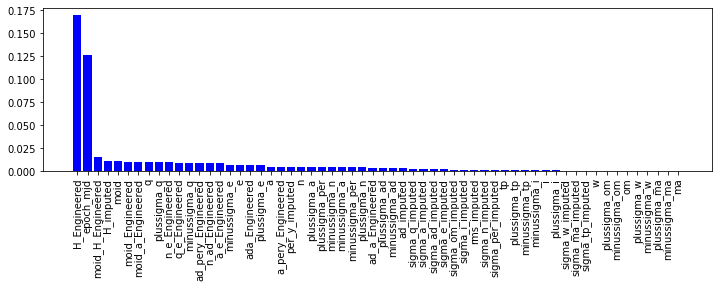

In [0]:
mi_result = { item: mutual_info[i] for i, item in enumerate(cols) }
sort_result = sorted(mi_result.items(), key=lambda item: item[1], reverse=True)
keys = [ item[0] for item in sort_result ]
values = [ item[1] for item in sort_result ]

x = np.arange(len(keys))
y = np.array(values)
import matplotlib.pyplot as plt
import pylab as pl
plt.figure(figsize=(12,3))
plt.bar(range(len(y)), y,color='blue',tick_label=keys)
pl.xticks(rotation=90)
plt.show()

In [0]:
selected = list(keys[:15]) + ['pha_encode']
selected_encoded = df_encoded.select(selected)
selected_test_encoded = test_encoded.select(selected)
selected_encoded.show(10)

+------------+---------+-----------------+---------+--------+---------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+----------+
H_Engineered|epoch_mjd|moid_H_Engineered|H_imputed| moid|moid_Engineered| moid_a_Engineered| q| plussigma_q| n_e_Engineered| q_e_Engineered| minussigma_q|ad_pery_Engineered| n_ad_Engineered| a_e_Engineered|pha_encode|
+------------+---------+-----------------+---------+--------+---------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+----------+
 1| 59000| 0| 19.1|0.871481| 0| 0.3531176502918703|1.8768504506302568|1.8768543717302568|0.49372625464488623|1.6373363603354534|-1.8768465295302568| 0.78899457520179|0.7776537907533047| 10.30403747829717| 0.0|
 1| 57245| 0| 19.699|0.801128| 0|0.33863907981382085| 1.805115668491649| 1.810757568491649| 0.5078399334687792|1.5681431858615598|-1.7994737684916489|0.8042099063613316|0.7926504210542904| 9.983134381280847| 0.0|
 1| 59000| 0| 16.4| 1.04054| 0|0.38315635313204083| 2.0358483554925| 2.0358484834925|0.47057462926832894|1.7855054868092863| -2.0358482274925|0.7587165277767886|0.7478109514021728|10.847946241300434| 0.0|
 1| 59000| 0| 19.048| 1.1768| 0| 0.4655421713523496| 2.17578643818893| 2.18222703818893| 0.3844972020411581|2.0365277220379014| -2.16934583818893|0.7165431386924941|0.7062437506620061|18.151864661327117| 0.0|
 1| 59000| 0| 17.6| 1.27057| 0| 0.4921182228490681|2.2598990545115965|2.2598993919815964|0.36227428759875047| 2.135205024686035|-2.2598987170415965|0.6999412884644746|0.6898805307247392| 20.7053935319497| 0.0|
 1| 59000| 0| 16.7| 1.16784| 0| 0.4473794662744395| 2.138801549023742| 2.138801700293742|0.41435343636479316|1.9581397250317447| -2.138801397753742|0.7307413259995935|0.7202378572480587|14.449103721182361| 0.0|
 1| 59000| 0| 16.2| 1.13758| 0|0.38319772985359785|2.1363833643716843|2.1363835280616845| 0.4730447513272076|1.8560314377592446| -2.136383200681684|0.7430903933798333|0.7324094226331005| 10.58901285446236| 0.0|
 1| 59000| 0| 16.4| 1.14612| 0| 0.3713341855380919| 2.159259856535146| 2.159260051405146| 0.4821795441777337|1.8588436699155735| -2.159259661665146| 0.740187224917112|0.7295479834911979|10.274053650733697| 0.0|
 1| 59000| 0| 17.3| 1.4944| 0| 0.5530562440950163|2.4777337278020988| 2.477733895152099|0.30492611178200096| 2.394707837388403|-2.4777335604520987|0.6588428802177303|0.6493728593521778| 32.54498060340565| 0.0|
 1| 59000| 0| 16.8| 1.71697| 0| 0.5552351009605802| 2.721284602610101| 2.721285369610101| 0.3012377594861495|2.6012957449554492|-2.7212838356101012| 0.636887320987167|0.6277328831085014|25.771807255454508| 0.0|
+------------+---------+-----------------+---------+--------+---------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+----------+
only showing top 10 rows

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

trainData = selected_encoded.rdd.map(list)
testData = selected_test_encoded.rdd.map(list)
#trainData, testData= dataSet.randomSplit([0.7, 0.3], seed=7)
trainingSet = trainData.map(lambda x:Row(label=x[-1], features=Vectors.dense(x[:-1]))).toDF()  
train_num = trainingSet.count()
print("训练样本数:{}".format(train_num))

训练样本数:750881

In [0]:
from pyspark.ml.classification import RandomForestClassifier
#使用随机森林进行训练
stringIndexer = StringIndexer(inputCol="label", outputCol="indexed")
si_model = stringIndexer.fit(trainingSet)
train_tf = si_model.transform(trainingSet)
train_tf.show(5)  
rf = RandomForestClassifier(numTrees=100, labelCol="indexed", seed=7)
rfModel = rf.fit(train_tf)

#输出模型特征重要性、子树权重
print("模型特征重要性:{}".format(rfModel.featureImportances))
print("模型特征数:{}".format(rfModel.numFeatures))

+-----+--------------------+-------+
label| features|indexed|
+-----+--------------------+-------+
 0.0|[1.0,59000.0,0.0,...| 0.0|
 0.0|[1.0,57245.0,0.0,...| 0.0|
 0.0|[1.0,59000.0,0.0,...| 0.0|
 0.0|[1.0,59000.0,0.0,...| 0.0|
 0.0|[1.0,59000.0,0.0,...| 0.0|
+-----+--------------------+-------+
only showing top 5 rows

模型特征重要性:(15,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[0.22873419874152526,0.004144785848616569,0.5128057814216993,0.035334464240584174,0.020506015742123705,0.12965292251806204,0.00010817875637782395,0.007230999410918429,0.016315898382345914,0.006423399603444636,0.0001943621878308282,0.011416877246194588,0.015669556063325745,0.010307261803426846,0.001155298033524034])
模型特征数:15

In [0]:
#预测测试集
testSet = testData.map(lambda x:Row(label=x[-1], features=Vectors.dense(x[:-1]))).toDF()
test_num=testSet.count()
print("测试样本数:{}".format(test_num))
si_model = stringIndexer.fit(testSet)
test_tf = si_model.transform(testSet)  
predictResult = rfModel.transform(test_tf)
predictResult.show(5)
#spark.stop()


测试样本数:750881
+-----+--------------------+-------+--------------------+--------------------+----------+
label| features|indexed| rawPrediction| probability|prediction|
+-----+--------------------+-------+--------------------+--------------------+----------+
 0.0|[1.0,59000.0,0.0,...| 0.0|[99.9944391640336...|[0.99994439164033...| 0.0|
 0.0|[1.0,57245.0,0.0,...| 0.0|[99.9944391640336...|[0.99994439164033...| 0.0|
 0.0|[1.0,59000.0,0.0,...| 0.0|[99.9944391640336...|[0.99994439164033...| 0.0|
 0.0|[1.0,59000.0,0.0,...| 0.0|[99.9944391640336...|[0.99994439164033...| 0.0|
 0.0|[1.0,59000.0,0.0,...| 0.0|[99.9944391640336...|[0.99994439164033...| 0.0|
+-----+--------------------+-------+--------------------+--------------------+----------+
only showing top 5 rows

In [0]:
#将预测结果转为python中的dataframe
columns=predictResult.columns#提取强表字段
predictResult=predictResult.take(test_num)
columnsIndex = { item: i for i,item in enumerate(columns) }

['label', 'features', 'indexed', 'rawPrediction', 'probability', 'prediction']

In [0]:
from sklearn import metrics
#性能评估
y=[ row[columnsIndex['indexed']] for row in predictResult ]
y_pred=[ row[columnsIndex['prediction']] for row in predictResult ]
y_predprob=[x[1] for x in [ row[columnsIndex['probability']] for row in predictResult ]]
precision_score=metrics.precision_score(y, y_pred)#精确率
recall_score=metrics.recall_score(y, y_pred)#召回率
accuracy_score=metrics.accuracy_score(y, y_pred)#准确率
f1_score=metrics.f1_score(y, y_pred)#F1分数
auc_score=metrics.roc_auc_score(y, y_predprob)#auc分数
print("精确率:",precision_score )#精确率
print("召回率:",recall_score )#召回率
print("准确率:",accuracy_score )#准确率
print("F1分数:", f1_score)#F1分数
print("auc分数:",auc_score )#auc分数

精确率: 0.9968982630272953
召回率: 0.9721718088324259
准确率: 0.9999320797836142
F1分数: 0.9843797856049006
auc分数: 0.9999068345311996

In [0]:
def undersample(minor_ratio, df, target_column="pha_encode"):
  """
  Args:
    minor_ratio: the expected ratio of the minorities in the dataframe
    major_df: a dataframe that only contains a major class
    minor_df: a dataframe that only contains a minor class
  
  Returns:
    returns a dataframe after performing under-sampling
  """
  assert 0 < minor_ratio < 1
  
  major_df = df.filter(col(target_column) == 1)
  minor_df = df.filter(col(target_column) == 0)
  
  minor_count, major_count = minor_df.count(), major_df.count()
  if major_count < minor_count:
    major_df, minor_df = minor_df, major_df
    
  sample_fraction = minor_count / minor_ratio * (1 - minor_ratio) / major_count
  return major_df.sample(False, sample_fraction, seed=1).unionAll(minor_df)
 
def oversample(minor_ratio, df, target_column="pha_encode"):
  """
  
  """
  assert 0 < minor_ratio < 1
  
  major_df = df.filter(col(target_column) == 1)
  minor_df = df.filter(col(target_column) == 0)
  
  minor_count, major_count = minor_df.count(), major_df.count()
  if major_count < minor_count:
    major_df, minor_df = minor_df, major_df
    
  minor_count, major_count = minor_df.count(), major_df.count()
  sample_fraction = (major_count / (1 - minor_ratio) * minor_ratio - minor_count) / minor_count
  return minor_df.sample(True, sample_fraction, seed=1).unionAll(minor_df).unionAll(major_df)

In [0]:
from functools import reduce
from pyspark.sql import DataFrame
def up_sample_cv(df, k, minor_ratio, classifier):
  k_folds = df.randomSplit(df, [1] * k)
  for i in range(k):
    union_lists = k_folds[:k] + k_folds[k + 1:]
    validation_data = k_folds[k]
    train_data = reduce(DataFrame.unionAll, union_lists)
    up_sample_train = oversample(minor_ratio, train_data)
    predictions = classifier.fit(up_sample_train).transform(validation_data)
    